In [2]:
import pandas as pd
import numpy as np

In [3]:
from statsmodels.tsa.ar_model import AutoReg

In [4]:
df=pd.read_csv('uspopulation.csv', index_col='DATE',parse_dates=True)
df.index.freq='MS'

In [6]:
df.head()

,PopEst
DATE,
2011-01-01,311037
2011-02-01,311189
2011-03-01,311351
2011-04-01,311522
2011-05-01,311699


<AxesSubplot:xlabel='DATE'>

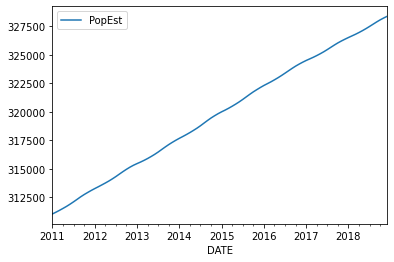

In [7]:
df.plot()

In [8]:
train=df.iloc[:84]
test=df.iloc[84:]
start=len(train)
stop=len(df)-1

In [9]:
AR1fit=AutoReg(train['PopEst'],lags=1).fit()

/Users/mirek/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


In [10]:
predictionsAR1=AR1fit.predict(start=start,end=stop,dynamic=False).rename('AR(1) predictions')

In [11]:
predictionsAR1

2018-01-01    326560.403377
2018-02-01    326742.749463
2018-03-01    326925.038278
2018-04-01    327107.269838
2018-05-01    327289.444162
2018-06-01    327471.561268
2018-07-01    327653.621173
2018-08-01    327835.623896
2018-09-01    328017.569455
2018-10-01    328199.457868
2018-11-01    328381.289152
2018-12-01    328563.063326
Freq: MS, Name: AR(1) predictions, dtype: float64

In [12]:
AR1fit.params

intercept    284.913797
PopEst.L1      0.999686
dtype: float64

<AxesSubplot:xlabel='DATE'>

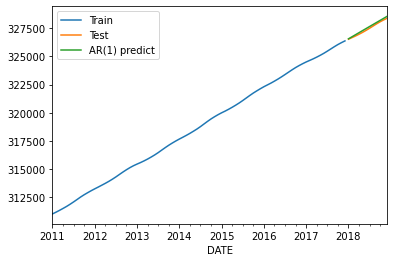

In [14]:
train['PopEst'].plot(legend=True,label='Train')
test['PopEst'].plot(legend=True,label='Test')
predictionsAR1.plot(legend=True,label='AR(1) predict')